In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train (3).csv")

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(8693, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
#dropping the unique column
df=df.drop(columns=["Name","PassengerId"],axis=1)

In [7]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [8]:
#missing value treatment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [9]:
df.isnull().sum()/len(df)*100

HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
dtype: float64

In [10]:
df["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [11]:
df["HomePlanet"]=df["HomePlanet"].fillna("Earth")

In [12]:
df["CryoSleep"].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [13]:
df["CryoSleep"]=df["CryoSleep"].fillna(False)

In [14]:
df["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [15]:
df["Destination"]=df["Destination"].fillna("TRAPPIST-1e")

In [16]:
df["Age"].value_counts()

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

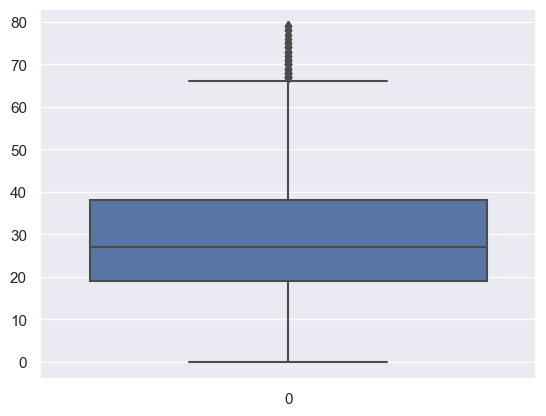

In [17]:
sns.boxplot(df["Age"])
plt.show()

In [18]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [19]:
df["VIP"].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [20]:
df["VIP"]=df["VIP"].fillna(False)

In [21]:
df["RoomService"].value_counts()

RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64

In [22]:
df["RoomService"]=df["RoomService"].fillna(df["RoomService"].median())

In [23]:
df["FoodCourt"]=df["FoodCourt"].fillna(df["FoodCourt"].median())

In [24]:
df["ShoppingMall"]=df["ShoppingMall"].fillna(df["ShoppingMall"].median())

In [25]:
df["VRDeck"]=df["VRDeck"].fillna(df["VRDeck"].median())

In [26]:
df["Spa"]=df["Spa"].fillna(df["Spa"].median())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8494 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 636.8+ KB


In [28]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [29]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [30]:
df=df.drop(columns=["Cabin"],axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8494 non-null   object 
 12  Cabin_num     8494 non-null   object 
 13  Side          8494 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 772.7+ KB


In [32]:
df["Deck"].value_counts()

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [33]:
df["Deck"]=df["Deck"].fillna("F")

In [34]:
df["Cabin_num"]=df["Cabin_num"].fillna("82")

In [35]:
df["Cabin_num"].value_counts()

Cabin_num
82      227
19       22
86       22
56       21
176      21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: count, Length: 1817, dtype: int64

In [36]:
df["Side"].value_counts()

Side
S    4288
P    4206
Name: count, dtype: int64

In [37]:
df["Side"]=df["Side"].fillna("S")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  Cabin_num     8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 772.7+ KB


In [39]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [46]:
#encoding
df["Transported"].astype(int)

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32

In [47]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8693 non-null   object 
 12  Cabin_num     8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 772.7+ KB


In [50]:
df["Side"]=df["Side"].astype("category")
df["Side"]=df["Side"].cat.codes

In [51]:
df["Transported"]=df["Transported"].astype("category")
df["Transported"]=df["Transported"].cat.codes

In [52]:
df["CryoSleep"]=df["CryoSleep"].astype("category")
df["CryoSleep"]=df["CryoSleep"].cat.codes

In [53]:
df["VIP"]=df["VIP"].astype("category")
df["VIP"]=df["VIP"].cat.codes

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int8   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int8   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int8   
 11  Deck          8693 non-null   object 
 12  Cabin_num     8693 non-null   object 
 13  Side          8693 non-null   int8   
dtypes: float64(6), int8(4), object(4)
memory usage: 713.2+ KB


In [56]:
#dropping cabin num as it's not relevent
df=df.drop(columns=["Cabin_num"],axis=1)

In [57]:
df["HomePlanet"].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [58]:
df["HomePlanet"]=df["HomePlanet"].astype("category")
df["HomePlanet"]=df["HomePlanet"].cat.codes

In [61]:
df=pd.get_dummies(df,columns=["HomePlanet"],dtype=int)

In [62]:
df["Destination"].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [63]:
df["Destination"]=df["Destination"].astype("category")
df["Destination"]=df["Destination"].cat.codes

In [64]:
df=pd.get_dummies(df,columns=["Destination"],dtype=int)

In [65]:
df["Deck"].value_counts()

Deck
F    2993
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [66]:
df["Deck"]=df["Deck"].astype("category")
df["Deck"]=df["Deck"].cat.codes

In [67]:
df=pd.get_dummies(df,columns=["Deck"],dtype=int)

In [69]:
df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Side,...,Destination_1,Destination_2,Deck_0,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,...,0,1,0,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,...,0,1,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,1,0,0,0,0,0,1,0,0


In [71]:
df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Side', 'HomePlanet_0', 'HomePlanet_1',
       'HomePlanet_2', 'Destination_0', 'Destination_1', 'Destination_2',
       'Deck_0', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5', 'Deck_6',
       'Deck_7'],
      dtype='object')

In [72]:
df=df.drop(columns=["HomePlanet_0","Destination_0","Deck_0"],axis=1)

In [73]:
#imbalancecheck
df["Transported"].value_counts()

Transported
1    4378
0    4315
Name: count, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      8693 non-null   int8   
 1   Age            8693 non-null   float64
 2   VIP            8693 non-null   int8   
 3   RoomService    8693 non-null   float64
 4   FoodCourt      8693 non-null   float64
 5   ShoppingMall   8693 non-null   float64
 6   Spa            8693 non-null   float64
 7   VRDeck         8693 non-null   float64
 8   Transported    8693 non-null   int8   
 9   Side           8693 non-null   int8   
 10  HomePlanet_1   8693 non-null   int32  
 11  HomePlanet_2   8693 non-null   int32  
 12  Destination_1  8693 non-null   int32  
 13  Destination_2  8693 non-null   int32  
 14  Deck_1         8693 non-null   int32  
 15  Deck_2         8693 non-null   int32  
 16  Deck_3         8693 non-null   int32  
 17  Deck_4         8693 non-null   int32  
 18  Deck_5  

In [75]:
x=df.drop(columns=["Transported"],axis=1)

In [76]:
y=df[["Transported"]]

In [77]:
x.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Side,HomePlanet_1,HomePlanet_2,Destination_1,Destination_2,Deck_1,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,1,0,0,0,0,1,0,0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,1,0,0,1,0,0,0,0,0,0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1,1,0,0,1,0,0,0,0,0,0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,1,0,0,0,0,1,0,0


In [78]:
y.head()

,Transported
0,0
1,1
2,0
3,0
4,1


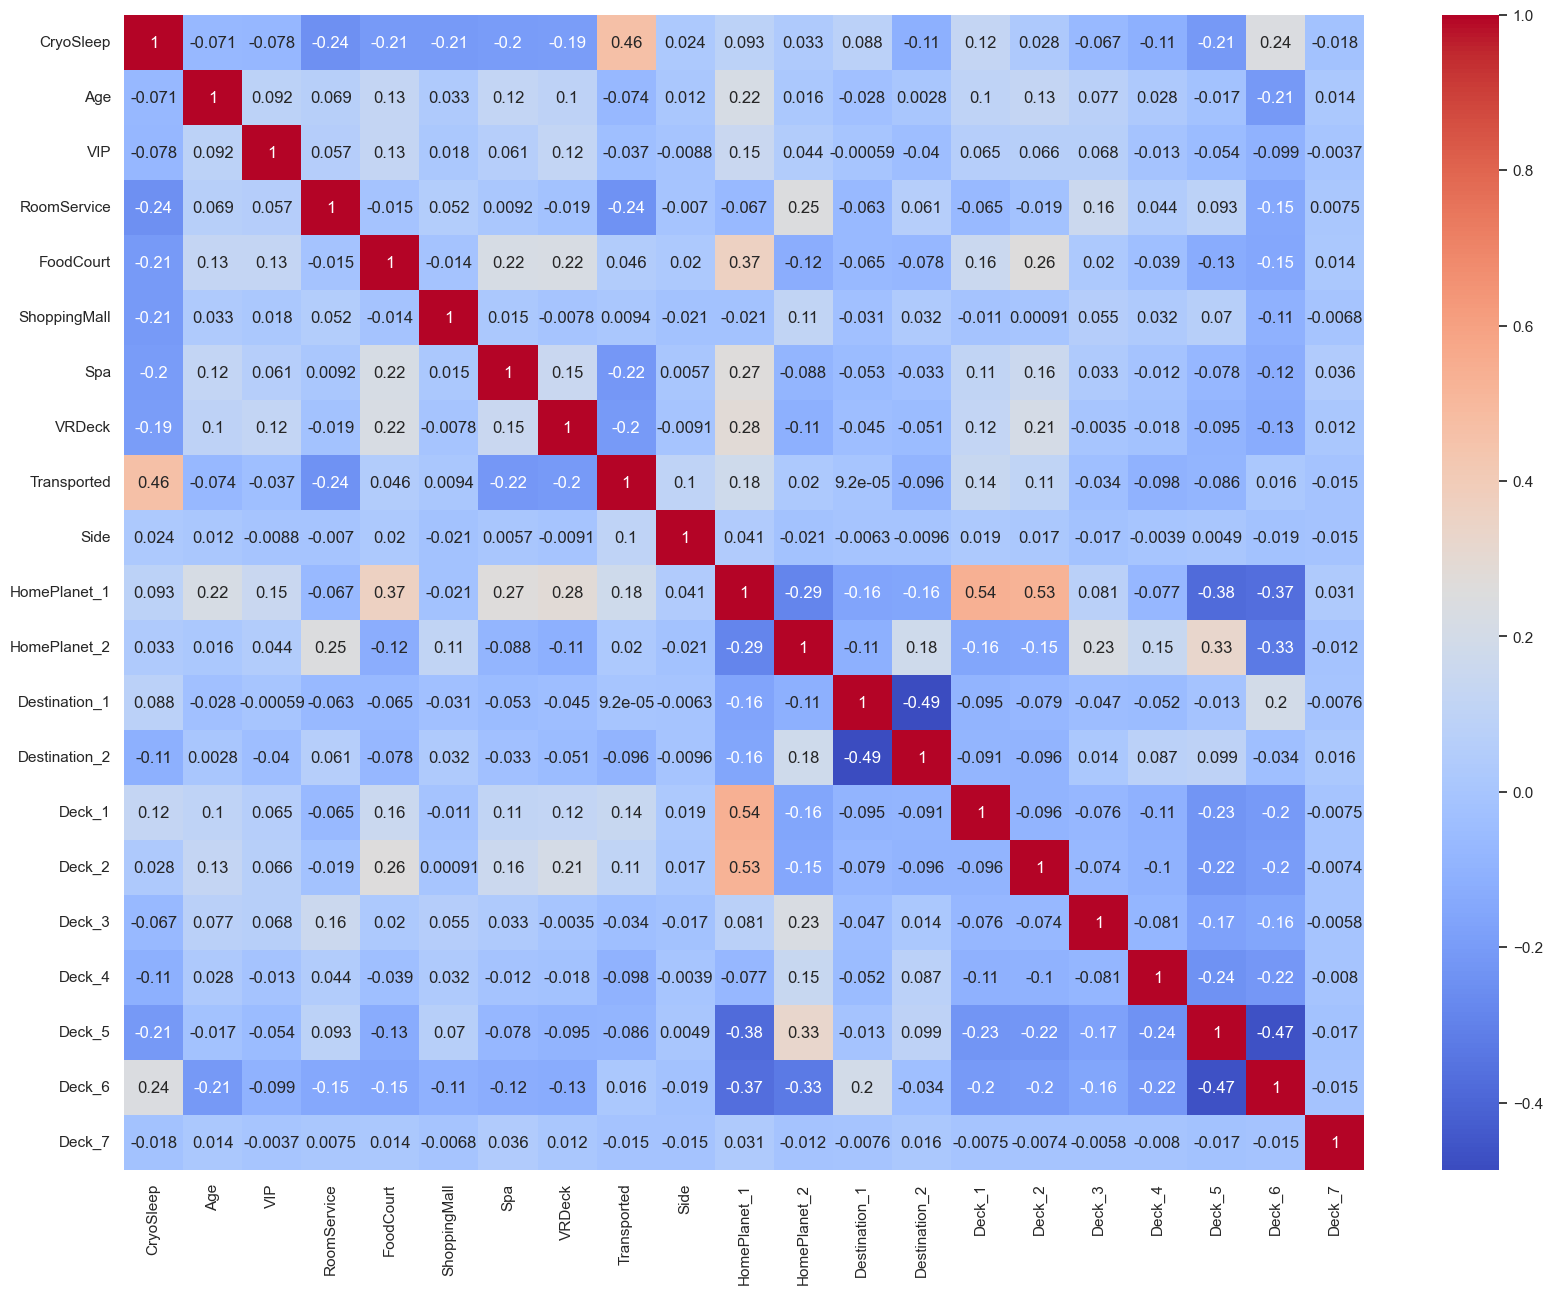

In [92]:
plt.figure(figsize=(20,15))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101,stratify=y)

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [98]:
y_pred_train=logit.predict(x_train)
y_pred_test=logit.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy_score(y_pred_train,y_train)

0.7890780794600399

In [100]:
accuracy_score(y_pred_test,y_test)

0.7985280588776449

In [101]:
print(classification_report(y_pred_train,y_train))
print("******")
print(classification_report(y_pred_test,y_test))


              precision    recall  f1-score   support

           0       0.77      0.80      0.78      3113
           1       0.81      0.78      0.79      3406

    accuracy                           0.79      6519
   macro avg       0.79      0.79      0.79      6519
weighted avg       0.79      0.79      0.79      6519

******
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1057
           1       0.81      0.79      0.80      1117

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



In [102]:
print(confusion_matrix(y_pred_train,y_train))
print("******")
print(confusion_matrix(y_pred_test,y_test))

[[2487  626]
 [ 749 2657]]
******
[[849 208]
 [230 887]]


In [104]:
df1=df.drop(columns=['Side','Deck_1', 'Deck_2', 'Deck_3',
       'Deck_4', 'Deck_5', 'Deck_6', 'Deck_7'],axis=1)

In [103]:
df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Side', 'HomePlanet_1', 'HomePlanet_2',
       'Destination_1', 'Destination_2', 'Deck_1', 'Deck_2', 'Deck_3',
       'Deck_4', 'Deck_5', 'Deck_6', 'Deck_7'],
      dtype='object')

In [105]:
x1=df1.drop(columns=["Transported"],axis=1)

In [106]:
y1=df1[["Transported"]]

In [108]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.25,random_state=101,stratify=y)

In [109]:
logit=LogisticRegression()
logit.fit(x_train1,y_train1)

LogisticRegression()

In [111]:
y_pred_train1=logit.predict(x_train1)
y_pred_test1=logit.predict(x_test1)

In [112]:
print(accuracy_score(y_pred_train1,y_train1))
print("******")
print(accuracy_score(y_pred_test1,y_test1))

0.786010124252186
******
0.8026678932842686


In [113]:
print(classification_report(y_pred_train1,y_train1))
print("******")
print(classification_report(y_pred_test1,y_test1))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      3153
           1       0.80      0.78      0.79      3366

    accuracy                           0.79      6519
   macro avg       0.79      0.79      0.79      6519
weighted avg       0.79      0.79      0.79      6519

******
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1054
           1       0.82      0.80      0.81      1120

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



In [114]:
print(confusion_matrix(y_pred_train1,y_train1))
print("******")
print(confusion_matrix(y_pred_test1,y_test1))

[[2497  656]
 [ 739 2627]]
******
[[852 202]
 [227 893]]
